In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:

# Importing dataset
dataset = pd.read_csv('diabetes_dataset__2019.csv')

In [5]:
# Preview data
dataset


,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [6]:
dataset.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [11]:
# Label Encoding
columns_to_encode = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 
       'Smoking', 'Alcohol','RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic']

In [12]:
# Label encode the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,1,1,0,1,3,39.0,0,0,8,6,0,1,2,2,0,0,0,1
1,1,1,0,1,0,28.0,0,0,8,6,2,3,2,4,0,0,0,1
2,0,1,0,0,3,24.0,0,0,6,6,0,1,2,4,0,0,0,1
3,1,1,0,0,3,23.0,0,0,8,6,0,1,2,4,0,0,0,1
4,0,1,0,0,0,27.0,0,0,8,8,0,1,2,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,3,1,1,0,1,25.0,0,0,8,6,0,2,2,4,0,0,0,2
948,2,1,1,1,1,27.0,0,0,6,5,2,1,2,2,0,0,1,2
949,2,1,0,1,2,23.0,0,0,6,5,2,1,2,2,0,0,0,1
950,2,1,0,1,0,27.0,0,1,6,5,2,1,3,2,0,0,0,1


In [7]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual filename and path

df= dataset

#df = df[df['Diabetic']=="no"]

# Categorical variables
categorical_vars = ['Pdiabetes']
categorical_stats = {}
for var in categorical_vars:
    freq = df[var].value_counts(normalize=True) * 100
    categorical_stats[var] = freq.round(2)
categorical_stats = pd.DataFrame(categorical_stats)
print("\nFrequency (%) for categorical variables:")
print(categorical_stats)

# Statistical tests
independent_t_results = {}
chi_square_results = {}

# Perform chi-square tests
for var in categorical_vars:
    contingency_table = pd.crosstab(df['Diabetic'], df[var])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi_square_results[var] = {'chi-square': chi2, 'p-value': p_value}


print("\nChi-square test results:")
for var, results in chi_square_results.items():
    print(f"{var}: chi-square={results['chi-square']:.2f}, p-value={results['p-value']:.14f}")



Frequency (%) for categorical variables:
     Pdiabetes
0        98.42
yes       1.47
no        0.11

Chi-square test results:
Pdiabetes: chi-square=23.85, p-value=0.00008576473661


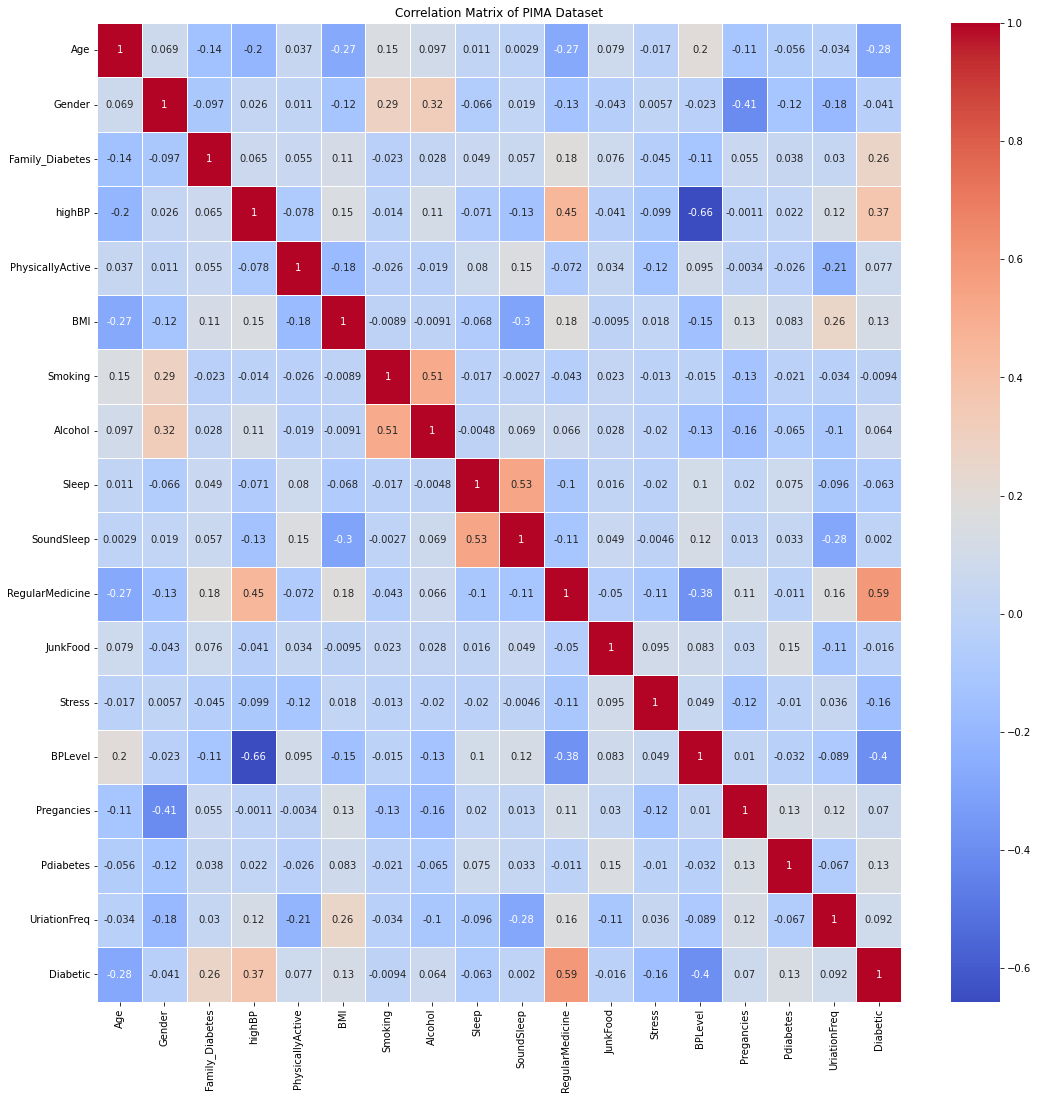

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of PIMA Dataset')
plt.show()

In [42]:
dataset['Diabetic'].value_counts()

no     684
yes    266
 no      1
Name: Diabetic, dtype: int64

In [43]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Calculate statistics for each numerical attribute
statistics = []
for column in numerical_columns:
    data_type = df[column].dtype
    description = df[column].describe()
    std = df[column].std()
    mean = description["mean"]
    cv = (std / mean) * 100  # Coefficient of Variation
    skewness = df[column].skew()
    total_sum = df[column].sum()
    variance = df[column].var()

    statistics.append([column, data_type, description, std, cv, skewness, total_sum, variance])

# Create a DataFrame from the statistics
statistics_df = pd.DataFrame(statistics, columns=["Feature Name", "Data Type", "Description", "Standard Deviation", "Coefficient of Variation", "Skewness", "Sum", "Variance"])

# Print the table
statistics_df



,Feature Name,Data Type,Description,Standard Deviation,Coefficient of Variation,Skewness,Sum,Variance
0,BMI,float64,count 948.000000 mean 25.763713 std ...,5.402595,20.969786,0.628125,24424.0,29.188038
1,Sleep,int64,count 952.000000 mean 6.949580 std ...,1.273189,18.320368,0.057849,6616.0,1.621009
2,SoundSleep,int64,count 952.000000 mean 5.495798 std ...,1.865618,33.946253,0.076713,5232.0,3.480529
3,Pregancies,float64,count 910.000000 mean 0.386813 std ...,0.909455,235.114822,2.185175,352.0,0.827109


In [44]:
# Dataset dimensions - (rows, columns)
dataset.shape

(952, 18)

In [45]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

**Handling Missing values**

In [46]:
dataset.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [47]:
# for removing rows.
indexes = dataset[dataset['Diabetic'].isna() | dataset['Pdiabetes'].isna() | dataset['BMI'].isna()].index.to_list()

print(indexes)
dataset.drop(index= indexes,inplace = True)

[113, 116, 121, 122, 134]


In [48]:
# for imputing pregnancies
print(dataset['Pregancies'].value_counts())
dataset['Pregancies'].fillna(value = 0.0, inplace= True)
print(dataset['Pregancies'].value_counts())
dataset['Pregancies'] = dataset['Pregancies'].astype(int)
dataset['Pregancies']

0.0    750
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregancies, Length: 947, dtype: int32

no     681
yes    265
 no      1
Name: Diabetic, dtype: int64
no     682
yes    265
Name: Diabetic, dtype: int64


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

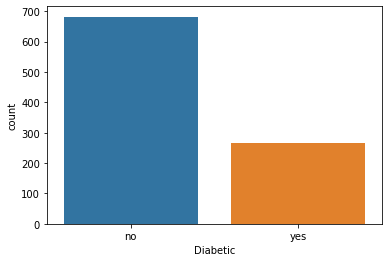

In [49]:
import seaborn
print(dataset['Diabetic'].value_counts())
dataset['Diabetic'].replace(' no', 'no', inplace=True)
print(dataset['Diabetic'].value_counts())
seaborn.countplot(x = 'Diabetic',data = dataset)

In [50]:
print(dataset['RegularMedicine'].value_counts())
dataset['RegularMedicine'].replace('o', 'no', inplace =True)
print(dataset['RegularMedicine'].value_counts())

no     611
yes    335
o        1
Name: RegularMedicine, dtype: int64
no     612
yes    335
Name: RegularMedicine, dtype: int64


In [51]:
print(dataset['Pdiabetes'].value_counts())
dataset['Pdiabetes'].replace('0', 'no', inplace = True)
print(dataset['Pdiabetes'].value_counts())

0      932
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     933
yes     14
Name: Pdiabetes, dtype: int64


**Numerical Variable Analysis**

<AxesSubplot:xlabel='Diabetic', ylabel='SoundSleep'>

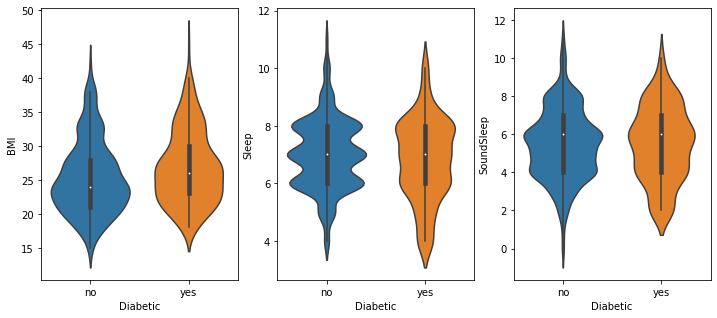

In [52]:
import matplotlib.pyplot as pyplot
import seaborn
fig = pyplot.figure(figsize= (12,5))
pyplot.subplot(131)
seaborn.violinplot(data = dataset, x = 'Diabetic', y = 'BMI')
pyplot.subplot(132)
seaborn.violinplot(data = dataset, x = 'Diabetic', y = 'Sleep')
pyplot.subplot(133)
seaborn.violinplot(data = dataset, x = 'Diabetic', y = 'SoundSleep')

**Categorical Variable Analysis**

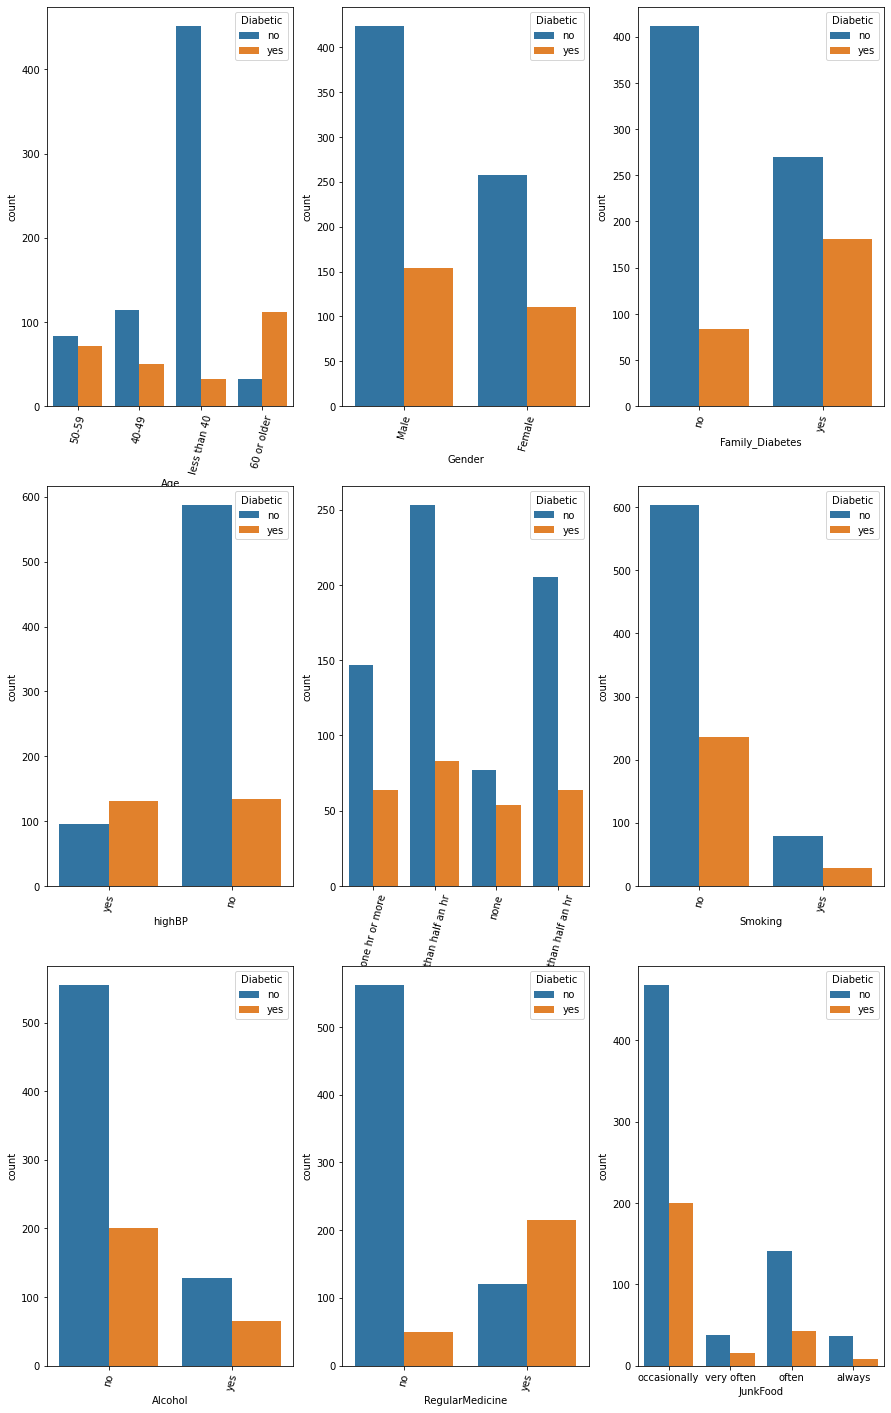

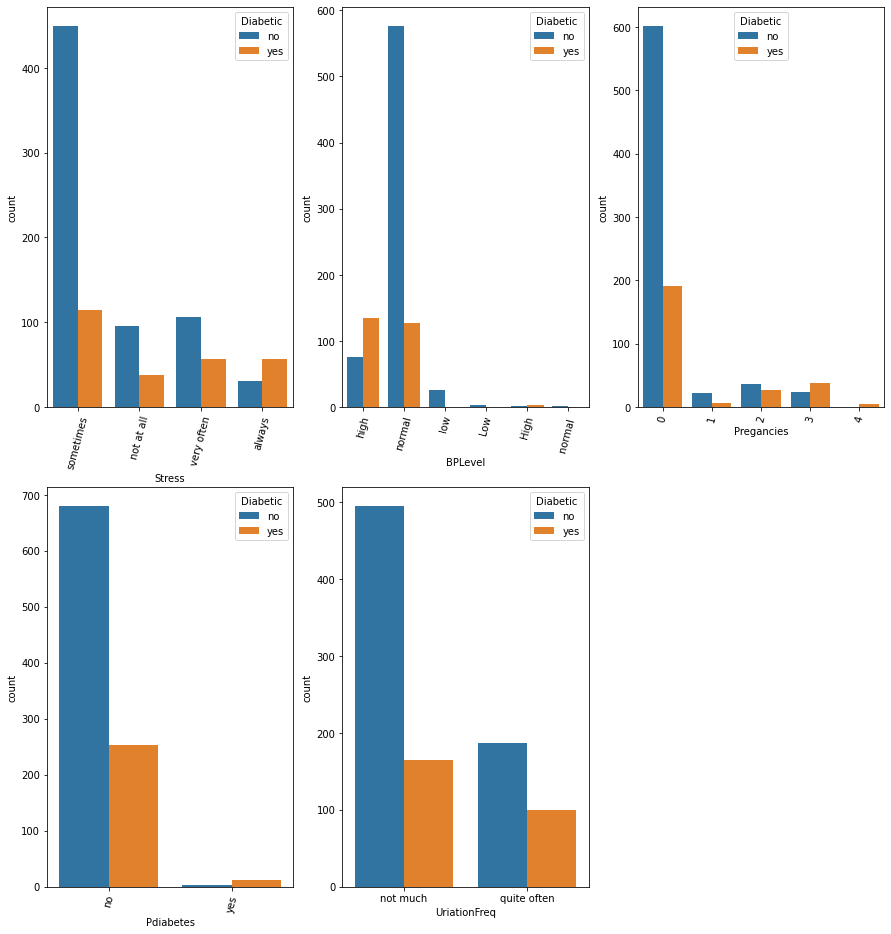

In [53]:
cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

pyplot.figure(figsize = (15,25))

i  = 0
for j in range(9):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = dataset)
    i += 1
pyplot.show()

pyplot.figure(figsize = (15,25))
for j in range(5):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = dataset)
    i += 1

In [54]:
y = dataset['Diabetic']
x = dataset.drop(columns= ['Diabetic'])

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

# Set the threshold value
threshold = 10

# Initialize SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Fit the selector on the data
selector.fit(x, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Set the threshold and select features above the threshold
selected_features = x.columns[scores > threshold]

print(selected_features )

ValueError: could not convert string to float: '50-59'

In [57]:
dataset = pd.get_dummies(dataset, drop_first= True)

preg = pd.get_dummies(dataset['Pregancies'],prefix='Pregnancies',drop_first= True)

print(preg.head())

dataset = pd.concat([preg,dataset], axis = 1)
dataset.drop(columns=['Pregancies'],inplace=True)

   Pregnancies_1  Pregnancies_2  Pregnancies_3  Pregnancies_4
0              0              0              0              0
1              0              0              0              0
2              0              0              0              0
3              0              0              0              0
4              0              0              0              0


In [58]:
dataset

,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,BMI,Sleep,SoundSleep,Age_50-59,Age_60 or older,Age_less than 40,...,Stress_sometimes,Stress_very often,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often,Diabetic_yes
0,0,0,0,0,39.0,8,6,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,28.0,8,6,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,24.0,6,6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,23.0,8,6,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,27.0,8,8,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,0,0,25.0,8,6,0,0,1,...,1,0,0,0,0,1,0,0,0,1
948,0,0,0,0,27.0,6,5,0,1,0,...,1,0,0,1,0,0,0,0,1,1
949,0,0,0,0,23.0,6,5,0,1,0,...,1,0,0,1,0,0,0,0,0,0
950,0,0,0,0,27.0,6,5,0,1,0,...,0,1,0,1,0,0,0,0,0,0


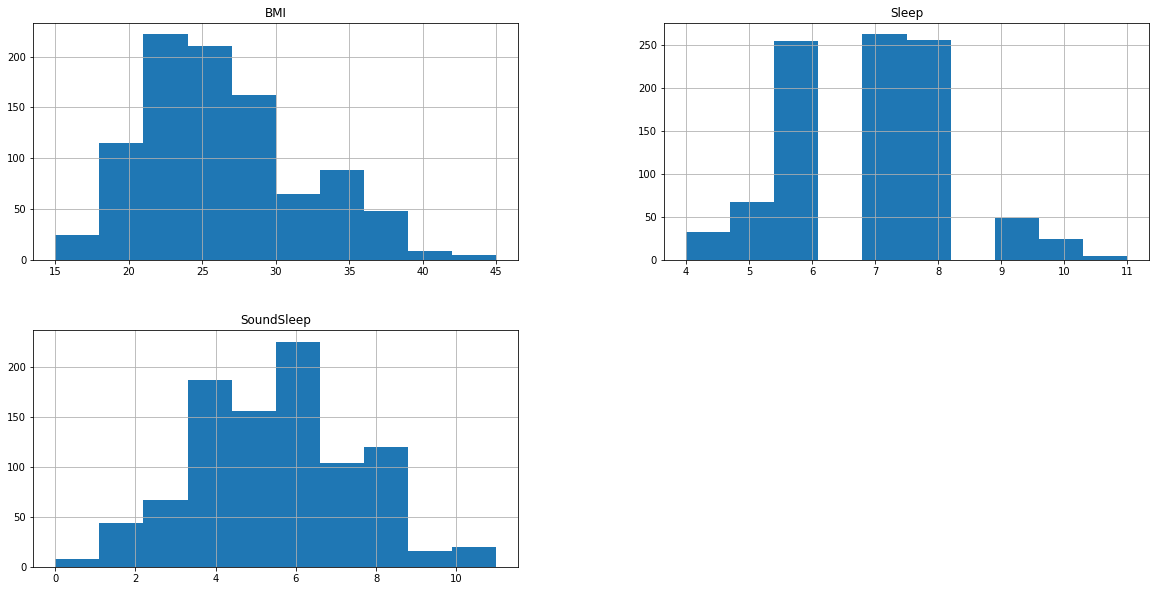

In [59]:
dataset[['BMI', 'Sleep','SoundSleep']].hist(figsize=(20,10))
pyplot.show()

In [60]:
# Standardizing all features since they show a gaussian distribution.

standard_dataset = dataset.copy()
# y = standard_dataset['Diabetic_yes']
# x = standard_dataset.drop(columns = ['Diabetic_yes'])

from sklearn.preprocessing import StandardScaler
cols = ['BMI','Sleep','SoundSleep']
standard_dataset[cols] = StandardScaler().fit_transform(standard_dataset[cols].values)
standard_dataset

,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,BMI,Sleep,SoundSleep,Age_50-59,Age_60 or older,Age_less than 40,...,Stress_sometimes,Stress_very often,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often,Diabetic_yes
0,0,0,0,0,2.450335,0.821693,0.268666,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0.413050,0.821693,0.268666,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,-0.327780,-0.748727,0.268666,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,-0.512988,0.821693,0.268666,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.227843,0.821693,1.339936,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,0,0,-0.142573,0.821693,0.268666,0,0,1,...,1,0,0,0,0,1,0,0,0,1
948,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,...,1,0,0,1,0,0,0,0,1,1
949,0,0,0,0,-0.512988,-0.748727,-0.266969,0,1,0,...,1,0,0,1,0,0,0,0,0,0
950,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [61]:
y = dataset['Diabetic_yes']
x = dataset.drop(columns= ['Diabetic_yes'])

stan_y = standard_dataset['Diabetic_yes']
stan_x = standard_dataset.drop(columns=['Diabetic_yes'])

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

stan_x_train, stan_x_test, stan_y_train, stan_y_test = train_test_split(stan_x, stan_y, test_size = 0.25, random_state = 42)

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

# Set the threshold value
threshold = 10

# Initialize SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Fit the selector on the data
selector.fit(x, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Set the threshold and select features above the threshold
selected_features = x.columns[scores > threshold]

print(selected_features )

Index(['Pregnancies_3', 'Pregnancies_4', 'BMI', 'Age_50-59', 'Age_60 or older',
       'Age_less than 40', 'Family_Diabetes_yes', 'highBP_yes',
       'PhysicallyActive_none', 'RegularMedicine_yes', 'Stress_sometimes',
       'BPLevel_high', 'BPLevel_low', 'BPLevel_normal', 'Pdiabetes_yes'],
      dtype='object')


In [63]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (710, 32)
X_test shape: (237, 32)
Y_train shape: (710,)
Y_test shape: (237,)


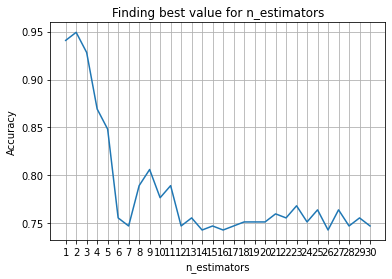

Highest value:  0.9493670886075949


In [64]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [66]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, Y_train = ros.fit_resample(X_train, Y_train)
X_test, Y_test = ros.fit_resample(X_test, Y_test)

from collections import Counter

print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({1: 518, 0: 518})
Testing target statistics: Counter({0: 164, 1: 164})


In [30]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)


K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.6585365853658537
Precision: 0.8503937007874016
F1 Score: 0.7422680412371135
Accuracy: 0.7713414634146342
AUC Score: 0.7713414634146343
Average CV Recall: 0.6428117998506349
Standard Deviation of CV Recall: 0.062246736600595945
Confusion Matrix:
[[145  19]
 [ 56 108]]


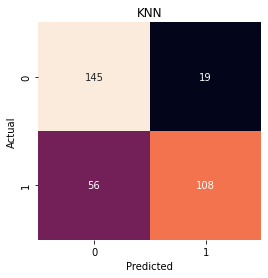

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


knn_scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(knn, X_train, Y_train, cv=5, scoring='recall')

knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
#svc.fit(X_train, Y_train)

K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.8963414634146342
Precision: 0.8258426966292135
F1 Score: 0.8596491228070176
Accuracy: 0.8536585365853658
AUC Score: 0.853658536585366
Average CV Recall: 0.8648431665421956
Standard Deviation of CV Recall: 0.016269668888732432
Confusion Matrix:
[[133  31]
 [ 17 147]]


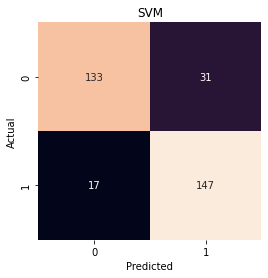

In [33]:
# KNN
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
#svc.fit(X_train, Y_train)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

knn_scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(svc, X_train, Y_train, cv=5, scoring='recall')

svc.fit(X_train, Y_train)
knn_predictions = svc.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
nb = XGBClassifier()
#nb = AdaBoostClassifier()
#nb.fit(X_train, Y_train)

K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.9085365853658537
Precision: 0.93125
F1 Score: 0.9197530864197531
Accuracy: 0.9207317073170732
AUC Score: 0.9207317073170732
Average CV Recall: 0.9710604929051531
Standard Deviation of CV Recall: 0.014872435339839377
Confusion Matrix:
[[153  11]
 [ 15 149]]


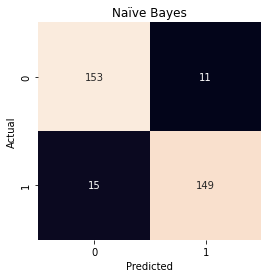

In [39]:
# KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

knn_scores = cross_val_score(nb, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(nb, X_train, Y_train, cv=5, scoring='recall')

nb.fit(X_train, Y_train)
knn_predictions = nb.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [67]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.9085365853658537
Precision: 0.9254658385093167
F1 Score: 0.916923076923077
Accuracy: 0.9176829268292683
AUC Score: 0.9176829268292683
Average CV Recall: 0.9749066467513069
Standard Deviation of CV Recall: 0.007693213981139628
Confusion Matrix:
[[152  12]
 [ 15 149]]


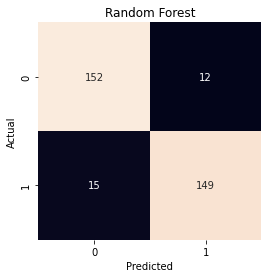

In [91]:
# KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

knn_scores = cross_val_score(ranfor, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(ranfor, X_train, Y_train, cv=5, scoring='recall')

ranfor.fit(X_train, Y_train)
knn_predictions = ranfor.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.8658536585365854
Precision: 0.8255813953488372
F1 Score: 0.8452380952380953
Accuracy: 0.8414634146341463
AUC Score: 0.8414634146341463
Average CV Recall: 0.8686893203883495
Standard Deviation of CV Recall: 0.02363453531884226
Confusion Matrix:
[[134  30]
 [ 22 142]]


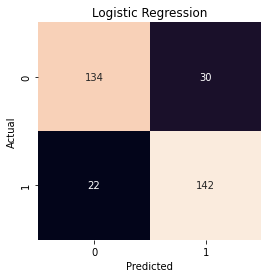

In [41]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0, penalty = 'l2')
# KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

knn_scores = cross_val_score(lg, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(lg, X_train, Y_train, cv=5, scoring='recall')

lg.fit(X_train, Y_train)
knn_predictions = lg.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K Nearest Neighbors (KNN) Model Evaluation:
Recall: 0.8963414634146342
Precision: 0.8546511627906976
F1 Score: 0.875
Accuracy: 0.8719512195121951
AUC Score: 0.8719512195121952
Average CV Recall: 0.8726101568334578
Standard Deviation of CV Recall: 0.025281576518502547
Confusion Matrix:
[[139  25]
 [ 17 147]]


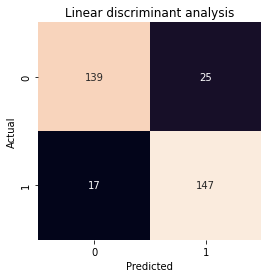

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lg =  LinearDiscriminantAnalysis()
# KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

knn_scores = cross_val_score(lg, X_train, Y_train, cv=5, scoring='accuracy')
knn_cv_recall = cross_val_score(lg, X_train, Y_train, cv=5, scoring='recall')

lg.fit(X_train, Y_train)
knn_predictions = lg.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_f1_score = f1_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_cv_avg_recall = knn_cv_recall.mean()
knn_cv_std_recall = knn_cv_recall.std()
knn_auc = roc_auc_score(Y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Model Evaluation:")
print("Recall:", knn_recall)
print("Precision:", knn_precision)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)
print("AUC Score:", knn_auc)
print("Average CV Recall:", knn_cv_avg_recall)
print("Standard Deviation of CV Recall:", knn_cv_std_recall)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))
cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=False)
plt.title('Linear discriminant analysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Making predictions on test dataset
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [42]:
# Accuracy on test set
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

K Nearest neighbors: 75.10548523206751
Support Vector Classifier: 88.18565400843882
Naive Bayes: 59.49367088607595
Decision tree: 96.62447257383965
Random Forest: 95.78059071729957


In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dectree)
cm

array([[161,   3],
       [  5,  68]], dtype=int64)

<AxesSubplot:>

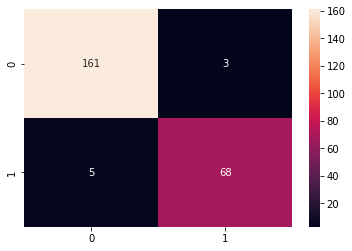

In [39]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g')

In [40]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dectree))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       164
           1       0.96      0.93      0.94        73

    accuracy                           0.97       237
   macro avg       0.96      0.96      0.96       237
weighted avg       0.97      0.97      0.97       237



In [42]:
# Standardize the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mean

In [45]:
# AdaBoosting

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm_ada = AdaBoostClassifier(base_estimator=svm)
svm_ada.fit(X_train_scaled, y_train)


AdaBoostClassifier(base_estimator=SVC(probability=True))

In [46]:

# Random Forest
rf = RandomForestClassifier()
rf_ada = AdaBoostClassifier(base_estimator=rf)
rf_ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [47]:
from sklearn.linear_model import Perceptron
# Naïve Bayes
nb = Perceptron()
nb_ada = AdaBoostClassifier(base_estimator=nb,algorithm='SAMME')
nb_ada.fit(X_train_scaled, y_train)


AdaBoostClassifier(algorithm='SAMME', base_estimator=Perceptron())

In [48]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# AdaBoost with Logistic Regression
logreg_ada = AdaBoostClassifier(base_estimator=logreg)
logreg_ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000))

In [49]:


# Bagging using the voting average technique

# Support Vector Machine (SVM)
svm_bagging = BaggingClassifier(base_estimator=svm, n_estimators=10)
svm_bagging.fit(X_train_scaled, y_train)

# Random Forest
rf_bagging = BaggingClassifier(base_estimator=rf, n_estimators=10)
rf_bagging.fit(X_train_scaled, y_train)

# Naïve Bayes
nb_bagging = BaggingClassifier(base_estimator=nb, n_estimators=10)
nb_bagging.fit(X_train_scaled, y_train)

logreg_bagging = BaggingClassifier(base_estimator=logreg, n_estimators=10)
logreg_bagging.fit(X_train_scaled, y_train)


BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

In [50]:

# Make predictions on the test set
svm_ada_preds = svm_ada.predict(X_test_scaled)
rf_ada_preds = rf_ada.predict(X_test_scaled)
nb_ada_preds = nb_ada.predict(X_test_scaled)
logreg_ada_preds = logreg_ada.predict(X_test_scaled)

svm_bagging_preds = svm_bagging.predict(X_test_scaled)
rf_bagging_preds = rf_bagging.predict(X_test_scaled)
nb_bagging_preds = nb_bagging.predict(X_test_scaled)
logreg_bagging_preds = logreg_bagging.predict(X_test_scaled)



In [51]:
from scipy.stats import mode

# Convert predictions to 1D arrays
svm_ada_preds = svm_ada_preds.ravel()
rf_ada_preds = rf_ada_preds.ravel()
nb_ada_preds = nb_ada_preds.ravel()
logreg_ada_preds = logreg_ada_preds.ravel()
svm_bagging_preds = svm_bagging_preds.ravel()
rf_bagging_preds = rf_bagging_preds.ravel()
nb_bagging_preds = nb_bagging_preds.ravel()
logreg_bagging_preds = logreg_bagging_preds.ravel()

# Ensemble predictions using voting average technique
ensemble_preds = mode([svm_ada_preds, rf_ada_preds, nb_ada_preds, logreg_ada_preds,
                       svm_bagging_preds, rf_bagging_preds, nb_bagging_preds, logreg_bagging_preds], axis=0)[0]

ensemble_preds = ensemble_preds.reshape(y_test.shape)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy:", accuracy)


Accuracy: 0.8597560975609756


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, ensemble_preds)
recall = recall_score(y_test, ensemble_preds)
f1 = f1_score(y_test, ensemble_preds)


In [53]:
print("precision: ", precision)
print("recall: ", recall)
print("F1 score: ", f1)

precision:  0.8933333333333333
recall:  0.8170731707317073
F1 score:  0.8535031847133757


In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ensemble_preds)
cm

array([[148,  16],
       [ 30, 134]], dtype=int64)

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import NuSVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

In [52]:
# Define classifiers
classifiers = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'AdaBoost': AdaBoostClassifier(),
    #'XGBoost': XGBClassifier(),
    'PAC': PassiveAggressiveClassifier(),
    'RC': RidgeClassifierCV(),
    #'Nu-SVC': NuSVC(),
    'LSVC': LinearSVC(),
    'CCCV': CalibratedClassifierCV(),
    'NC': NearestCentroid(),
    'GPC': GaussianProcessClassifier(),
    #'MNB': MultinomialNB(),
    #'ComplementNB': ComplementNB(),
    #'BNB': BernoulliNB(),
    #'CategoricalNB': CategoricalNB(),
    'Bagging': BaggingClassifier(),
    'ET': ExtraTreesClassifier(),
    'GBC': GradientBoostingClassifier(),
    'HGBC': HistGradientBoostingClassifier(),
    #'OVsRC': OneVsRestClassifier(),
    'MLP': MLPClassifier(),
    'LP': LabelPropagation(),
    'LS': LabelSpreading(),
    #'Stacking': StackingClassifier(),
    'RCCV': RidgeClassifierCV(),
    'LRCV': LogisticRegressionCV(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LGBM': LGBMClassifier()
}

# Initialize result dataframe
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(results)
    results = results.append({'Classifier': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

# Print results
print(results)

Empty DataFrame
Columns: [Classifier, Accuracy, Precision, Recall, F1 Score]
Index: []
  Classifier  Accuracy Precision    Recall  F1 Score
0        SGD  0.841463  0.814607  0.884146  0.847953
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.841463  0.814607  0.884146  0.847953
1  Perceptron  0.838415  0.824561  0.859756  0.841791
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.841463  0.814607  0.884146  0.847953
1  Perceptron  0.838415  0.824561  0.859756  0.841791
2    AdaBoost  0.881098  0.861272  0.908537  0.884273
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.841463  0.814607  0.884146  0.847953
1  Perceptron  0.838415  0.824561  0.859756  0.841791
2    AdaBoost  0.881098  0.861272  0.908537  0.884273
3         PAC  0.844512   0.83432  0.859756  0.846847
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.841463  0.814607  0.884146  0.847953
1  Perceptron  0.838415  0.824561  0.859756  0.8417

    Classifier  Accuracy Precision    Recall  F1 Score
0          SGD  0.841463  0.814607  0.884146  0.847953
1   Perceptron  0.838415  0.824561  0.859756  0.841791
2     AdaBoost  0.881098  0.861272  0.908537  0.884273
3          PAC  0.844512   0.83432  0.859756  0.846847
4           RC  0.871951  0.854651  0.896341     0.875
5         LSVC  0.859756  0.847059  0.878049  0.862275
6         CCCV  0.853659  0.845238  0.865854  0.855422
7           NC  0.853659  0.849398  0.859756  0.854545
8          GPC  0.908537   0.91875  0.896341  0.907407
9      Bagging  0.914634  0.919753  0.908537   0.91411
10          ET   0.92378  0.948387  0.896341   0.92163
11         GBC  0.902439   0.89759  0.908537   0.90303
12        HGBC  0.920732   0.93125  0.908537  0.919753
13         MLP  0.890244  0.921053  0.853659  0.886076
14          LP   0.92378  0.948387  0.896341   0.92163
15          LS   0.92378  0.948387  0.896341   0.92163
16        RCCV  0.871951  0.854651  0.896341     0.875
    Classi

In [53]:
results

,Classifier,Accuracy,Precision,Recall,F1 Score
0,SGD,0.841463,0.814607,0.884146,0.847953
1,Perceptron,0.838415,0.824561,0.859756,0.841791
2,AdaBoost,0.881098,0.861272,0.908537,0.884273
3,PAC,0.844512,0.83432,0.859756,0.846847
4,RC,0.871951,0.854651,0.896341,0.875
5,LSVC,0.859756,0.847059,0.878049,0.862275
6,CCCV,0.853659,0.845238,0.865854,0.855422
7,NC,0.853659,0.849398,0.859756,0.854545
8,GPC,0.908537,0.91875,0.896341,0.907407
9,Bagging,0.914634,0.919753,0.908537,0.91411


In [56]:
## Voting Classsifier


In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [60]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [86]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LP', LabelPropagation()))
estimator.append((  'LS', LabelSpreading()))
estimator.append(('RandomForest', DecisionTreeClassifier(criterion = 'entropy', random_state = 42) ))
#estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(( 'LGBM', LGBMClassifier()))
estimator.append(( 'HGBC', HistGradientBoostingClassifier() ))
estimator.append(('ET', ExtraTreesClassifier() ))
estimator.append(( 'GBC', GradientBoostingClassifier()))
estimator.append(('Bagging', BaggingClassifier()))

In [87]:
VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train_scaled, y_train)
y_pred = VC_hard.predict(X_test_scaled)

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.926829268292683


In [89]:
cm = confusion_matrix(y_test, y_pred)

VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[155   9]
 [ 15 149]]


In [90]:
from statistics import stdev
from sklearn.model_selection import cross_val_score
score = cross_val_score(VC_hard, X_train_scaled, y_train, cv=5, scoring='recall')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.94230769 0.98076923 0.97115385 0.97087379 0.98058252]
Average Cross Validation Recall score:  0.969137415982076
Cross Validation Recall standard deviation:  0.01575757487959226


In [91]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Voting Classifier', 'Hard Voting')
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.908537,0.943038,0.925466,0.926829,0.969137,0.015758


In [92]:
#Voting Classifier with soft voting

In [93]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       164
           1       0.93      0.91      0.92       164

    accuracy                           0.92       328
   macro avg       0.92      0.92      0.92       328
weighted avg       0.92      0.92      0.92       328



In [95]:
cm = confusion_matrix(y_test, y_pred)

VC_soft_Recall = recall_score(y_test, y_pred)
VC_soft_Precision = precision_score(y_test, y_pred)
VC_soft_f1 = f1_score(y_test, y_pred)
VC_soft_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[153  11]
 [ 15 149]]


In [96]:
score2 = cross_val_score(VC_soft, X_train, y_train, cv=5, scoring='recall')

In [97]:
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', VC_soft_cv_score)
print('Cross Validation Recall standard deviation: ', VC_soft_cv_stdev)

Cross Validation Recall scores are: [0.94230769 0.98076923 1.         0.97087379 0.98058252]
Average Cross Validation Recall score:  0.9749066467513069
Cross Validation Recall standard deviation:  0.02106666589440778


In [98]:
ndf2 = [(VC_soft_Recall, VC_soft_Precision, VC_soft_f1, VC_soft_accuracy, VC_soft_cv_score, VC_soft_cv_stdev)]

VC_soft_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_soft_score.insert(0, 'Voting Classifier', 'Soft Voting')
VC_soft_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Soft Voting,0.908537,0.93125,0.919753,0.920732,0.974907,0.021067


In [99]:
predictions = pd.concat([VC_hard_score, VC_soft_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
1,Soft Voting,0.908537,0.931250,0.919753,0.920732,0.974907,0.021067
0,Hard Voting,0.908537,0.943038,0.925466,0.926829,0.969137,0.015758


In [100]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")

AUC-ROC Curve for Voting Classifier with soft voting: 0.9207


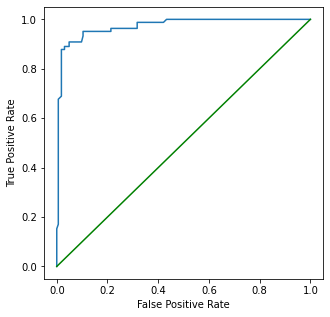

In [101]:
y_proba = VC_soft.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

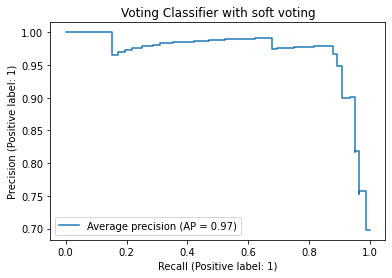

In [102]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    VC_soft, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Voting Classifier with soft voting")

In [68]:
##Explainablity

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer


In [98]:
feature_names = X_test.columns

In [108]:
X_test.iloc[16]

Pregnancies_1                             0.0
Pregnancies_2                             1.0
Pregnancies_3                             0.0
Pregnancies_4                             0.0
BMI                                      29.0
Sleep                                     7.0
SoundSleep                                4.0
Age_50-59                                 0.0
Age_60 or older                           1.0
Age_less than 40                          0.0
Gender_Male                               0.0
Family_Diabetes_yes                       1.0
highBP_yes                                1.0
PhysicallyActive_more than half an hr     0.0
PhysicallyActive_none                     0.0
PhysicallyActive_one hr or more           1.0
Smoking_yes                               0.0
Alcohol_yes                               0.0
RegularMedicine_yes                       1.0
JunkFood_occasionally                     1.0
JunkFood_often                            0.0
JunkFood_very often               

In [94]:
# Choose a test case for which you want to explain the decision
test_case_index = 4
test_case = X_test.iloc[16]

# Define feature names (replace with your feature names)
#X_test.columns

In [95]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="classification", training_labels=Y_train,feature_names=feature_names, random_state=42)

# Explain the prediction for the selected test case


In [96]:
explanation = explainer.explain_instance(test_case.values, ranfor.predict_proba)

In [97]:

# Print the explanation
explanation.show_in_notebook()

In [99]:
import shap
import graphviz 
explainer = shap.TreeExplainer(ranfor)
shap_values = explainer.shap_values(X_train)

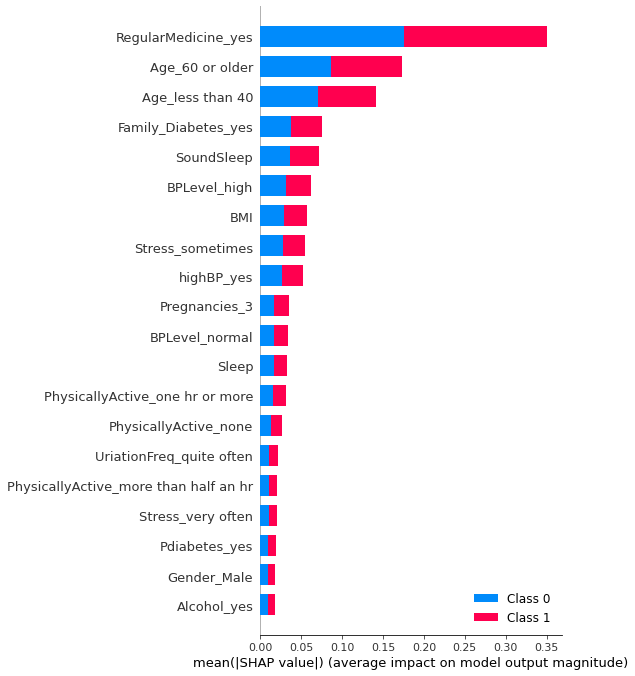

In [103]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

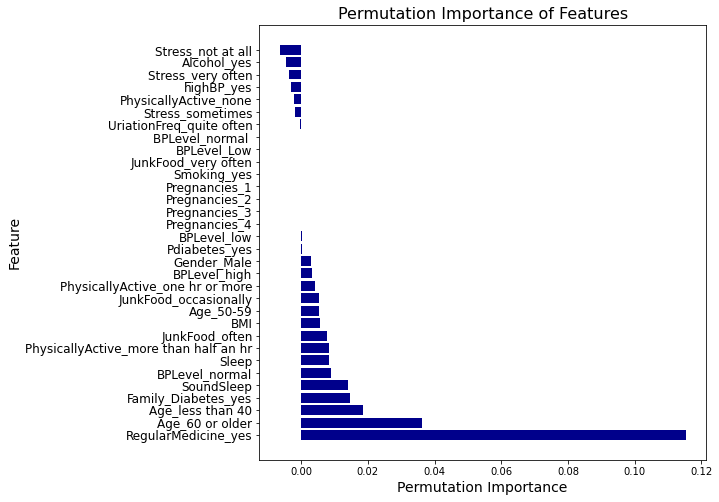

In [107]:
# Calculate permutation importance
# Calculate permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(ranfor, X_test, Y_test, n_repeats=30, random_state=42)

# Create a horizontal bar plot
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(8, 8))  # Set the figure size
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], color='darkblue')  # Set the bar color
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], fontsize=12)  # Set y-tick labels and font size
plt.xticks(fontsize=10)  # Set x-tick font size
plt.xlabel('Permutation Importance', fontsize=14)  # Set x-label and font size
plt.ylabel('Feature', fontsize=14)  # Set y-label and font size
plt.title('Permutation Importance of Features', fontsize=16)  # Set title and font size
plt.show()


